# Facteurs influençant le succès des projets de kickstarter 

Importation des dépendances

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

The command will be include graphs in the notebook

In [3]:
%matplotlib inline

Reading csv

In [4]:
df = pd.read_csv('dataset.csv')

## Premier balayage

In [5]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [6]:
df.tail()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.0
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.0
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.0
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.0
378660,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,2000.0,2011-07-19 09:07:47,524.0,failed,17,US,524.0,524.0,2000.0


In [7]:
df.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [8]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


Nous remarquons qu'il y a une différence significative dans certaines colonnes entre la valeur minimale et la valeur maximale.

## Etude des valeurs manquantes et dupliquées

In [9]:
print(df.isna().sum())
df[df['name'].isnull() == True]

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
166851,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00
307234,634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97
309991,648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,0.00,2500.00
338931,796533179,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00


Nous remarquons que sur 378660 lignes nous avons 3797 lignes (elles représentent 1% du nombre total de lignes) où il manque l'information usd pledged. puisque cette information est un flottant nous pouvons la remplacer par la moyenne supprimer ou ignorer.

Pour les projets qui n'ont pas de noms on remarque que aucun n'a réussi.

In [10]:
df.duplicated().sum()

0

Ce csv n'a aucune duplication

## Analyse des outliers

In [11]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


### Nous remarquons qu'il y a des projets où certaines valeurs de columns dépassent de loin la majorité des autres valeurs
### exemple :
##### cas goal : 
la valeur minimum est de 0.01 sinon entre 25% et 75% des cas on est entre 2000-4076 et la valeur max 100Millions
##### cas backers
entre 0% et 75% des cas on est entre 0-56 et la valeur max 219382 


## Analyse univariée

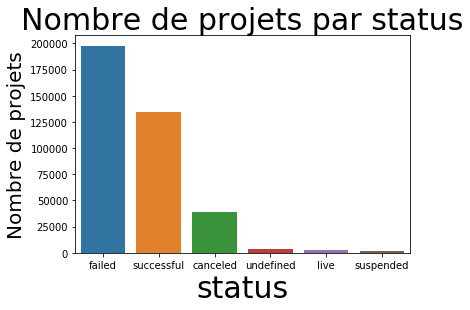

35.38% des projets ont été un succès
52.22% des projets ont échoué
10.24% des projets ont été annulé
2.17% autre etat de projets à faible pourcentage


In [36]:
state = sns.countplot('state', data=df, order=df['state'].value_counts().index)
state.axes.set_title('Nombre de projets par status',fontsize=30)
state.set_xlabel("status",fontsize=30)
state.set_ylabel("Nombre de projets",fontsize=20)
plt.show()
reussite = len(df[df['state'] == 'successful']) / len(df) * 100
echec = len(df[df['state'] == 'failed']) / len(df) * 100
annuler = len(df[df['state'] == 'canceled']) / len(df) * 100
autre = 100 - (reussite + echec + annuler)
print('{}% des projets ont été un succès\n\
{}% des projets ont échoué\n\
{}% des projets ont été annulé\n\
{}% autre etat de projets à faible pourcentage'.format(round(reussite, 2), 
                                                     round(echec, 2), 
                                                     round(annuler, 2), 
                                                     round(autre, 2)))

In [12]:
df.main_category.value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

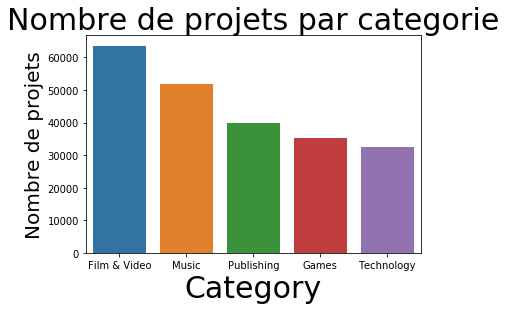

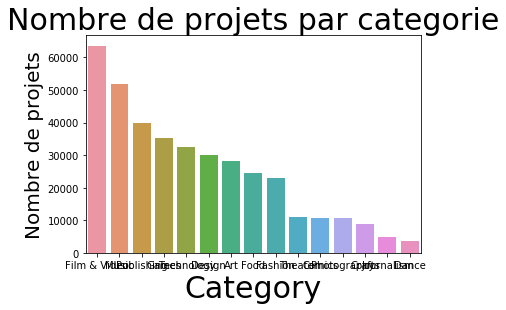

In [19]:
bar_main_category_head = sns.countplot('main_category', data=df, order=df['main_category'].value_counts().iloc[:5].index)
bar_main_category_head.axes.set_title('Nombre de projets par categorie',fontsize=30)
bar_main_category_head.set_xlabel("Category",fontsize=30)
bar_main_category_head.set_ylabel("Nombre de projets",fontsize=20)
plt.show()

bar_main_category = sns.countplot('main_category', data=df, order=df['main_category'].value_counts().index)
bar_main_category.axes.set_title('Nombre de projets par categorie',fontsize=30)
bar_main_category.set_xlabel("Category",fontsize=30)
bar_main_category.set_ylabel("Nombre de projets",fontsize=20)
plt.show()

On constate que par ordre décroissant la difference entre chaque Xi et Xi-1 la difference n'est pas tres grande

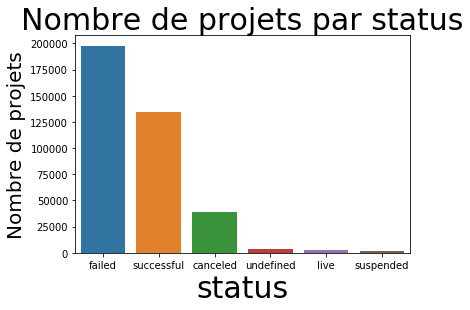

35.38% des projets ont été un succès
52.22% des projets ont échoué
10.24% des projets ont été annulé
2.17% autre etat de projets à faible pourcentage


In [35]:
state = sns.countplot('state', data=df, order=df['state'].value_counts().index)
state.axes.set_title('Nombre de projets par status',fontsize=30)
state.set_xlabel("status",fontsize=30)
state.set_ylabel("Nombre de projets",fontsize=20)
plt.show()
reussite = len(df[df['state'] == 'successful']) / len(df) * 100
echec = len(df[df['state'] == 'failed']) / len(df) * 100
annuler = len(df[df['state'] == 'canceled']) / len(df) * 100
autre = 100 - (reussite + echec + annuler)
print('{}% des projets ont été un succès\n\
{}% des projets ont échoué\n\
{}% des projets ont été annulé\n\
{}% autre etat de projets à faible pourcentage'.format(round(reussite, 2), 
                                                     round(echec, 2), 
                                                     round(annuler, 2), 
                                                     round(autre, 2)))

On constate que seulement 35,38% des projets réussissent.